# importing library

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import urllib 
from urllib import request
import requests
import re
import json
import pprint as pp
import random
import seaborn as sns

In [43]:
import os
wd = os.getcwd()

if wd[0] == '/' : # mac os
    
    import platform

    from matplotlib import font_manager, rc
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin' :
        rc('font', family = 'Applegothic')
    elif platform.system() == 'Windows' :
        path = 'c:/Window/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family = font_name)
    else : 
        print('Unknow system') 

    # Mac OS matplotlib 한글 폰트 지원
    
else : 
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    # Windows matplotlib 한글폰트 지원

# 막간 궁금증

1. 어떤 순발식이 최종 순위와 가장 상관이 높을까?
2. 방송기간 동안 데뷔연습생과 데뷔 못한 연습생의 검색량 차이는 어떨까?

# 궁금증 1

1. 어떤 순발식이 최종 순위와 가장 상관이 높을까?
    - 마지막 방송까지 시즌 1은 22명 시즌 2는 20명이 살아남았고 그 중 11명이 데뷔하였다.

In [44]:
s1 = pd.read_csv('s1_rtTotal.csv', encoding = 'cp949', index_col = 0)
s2 = pd.read_csv('s2_rtTotal.csv', encoding = 'cp949', index_col = 0)

In [20]:
s1_r1 = s1[s1['rank_1st_ep5']<=22]
s1_r2 = s1[s1['rank_2nd_ep8']<=22]
s1_r3 = s1[s1['ep10_rank']<=22]

s2_r1 = s1[s1['rank_1st_ep5']<=20]
s2_r2 = s1[s1['rank_2nd_ep8']<=20]
s2_r3 = s1[s1['ep10_rank']<=20]

1. Season 1

In [7]:
cf_s1_r1 = np.corrcoef(s1_r1['final_rank'], s1_r1['rank_1st_ep5'])
cf_s1_r1

array([[1.        , 0.55893153],
       [0.55893153, 1.        ]])

In [8]:
cf_s1_r2 = np.corrcoef(s1_r2['final_rank'], s1_r2['rank_2nd_ep8'])
cf_s1_r2

array([[1.        , 0.79994154],
       [0.79994154, 1.        ]])

In [9]:
cf_s1_r3 = np.corrcoef(s1_r3['final_rank'], s1_r3['ep10_rank'])
cf_s1_r3

array([[1.        , 0.64426877],
       [0.64426877, 1.        ]])

2. Season 2

In [10]:
cf_s2_r1 = np.corrcoef(s2_r1['final_rank'], s2_r1['rank_1st_ep5'])
cf_s2_r1

array([[1.        , 0.65647115],
       [0.65647115, 1.        ]])

In [11]:
cf_s2_r2 = np.corrcoef(s2_r2['final_rank'], s2_r2['rank_2nd_ep8'])
cf_s2_r2

array([[1.        , 0.81854057],
       [0.81854057, 1.        ]])

In [12]:
cf_s2_r3 = np.corrcoef(s2_r3['final_rank'], s2_r3['ep10_rank'])
cf_s2_r3

array([[1.        , 0.62689225],
       [0.62689225, 1.        ]])

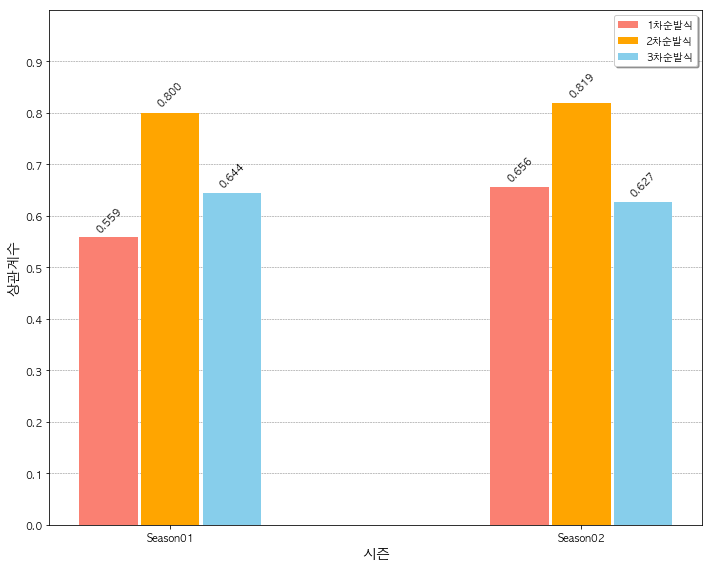

In [13]:
def main() : 
    
    # 1. bar plot으로 나타낼 데이터 입력
    duration = ['1차순발식','2차순발식', '3차순발식']
    xticks = ['Season01', 'Season02']
    data = {'1차순발식' : [cf_s1_r1[0][1],cf_s2_r1[0][1]],
           '2차순발식' : [cf_s1_r2[0][1],cf_s2_r2[0][1]],
           '3차순발식' : [cf_s1_r3[0][1],cf_s2_r3[0][1]]}
    
    # 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1, 1, figsize = (10, 8)) # 1X1 figure matrix 생성, 가로 9, 세로 7인치 크기 지정
    colors = ['salmon', 'orange', 'skyblue']
    width = 0.15

    # 3. bar 그리기
    for i, rt in enumerate(duration) : 
        pos = compute_pos(xticks, width, i, duration)
        bar = ax.bar(pos, data[rt], width = width*0.95, label = rt, color = colors[i])
        present_height(ax, bar)
        
    # 4. x축 세부설정
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.set_xlabel('시즌', fontsize = 14)

    
    # 5. y축 세부설정
    ax.set_ylim([0.0, 1.0])
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('상관계수', fontsize = 14)
    
    # 6. 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1)
    
    # 7. 보조선 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

    # 8. 그래프 출력
    plt.tight_layout()
    plt.show()
    
def compute_pos(xticks, width, i, duration) : 
    index = np.arange(len(xticks))
    n = len(duration)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar) : 
    for rect in bar :
        height = rect.get_height()
        posx = rect.get_x() + rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, rotation = 45, ha = 'center', va = 'bottom')
            
if __name__=='__main__' : 
    main()

- 2차기간의 검색량과 2차 순발식 순위와 가장 상관도가 높았는데 이번에도 2차기간의 순위가 최종 순위와 가장 상관도가 높게 나왔습니다.
- 지인피셜로 포지션 평가가 코어를 모으고 떡상하는데 가장 중요한 무대라고 하는데 그게 확실히 나타나는 지표인 것 같습니다. 

# 궁금증 2

2. 방송기간 동안 데뷔연습생과 데뷔 못한 연습생의 검색량 차이는 어떨까?

 - 데뷔를 가리는 생방송에 진출한 연습생들은 시즌1 22명, 시즌2 20명, 시즌4 20명이었다.
 - 이들의 일자별 검색량 그래프를 그려보고 특히 데뷔자들이 공통적으로 가지는 특징을 정리해보고 평균 그래프도 그려보자
 - 데뷔하는 연습생들이 가지는 그래프의 특징은 크게 3가지가 있었다.
     1. 언제나 상위권 (100이 많은 그래프)
     2. 약간 굴곡이 있지만 대체로 상위권 (대체로 100이 많은 그래프)
     3. 하위권이었지만 특정 기점 이후 급상승
 - 위 3가지 공통점에 들지 못하는 데뷔자들도 있었고 위 조건에 충족했지만 데뷔하지 못한 연습생도 있었다.
 - 데뷔하지 못한 연습생의 그래프를 그려보고 차이를 본다.

## 데뷔 연습생 그래프 그리기

In [45]:
s1_rt01 = pd.read_csv('s1_rt01.csv', encoding = 'cp949', index_col = 0)
s1_rt02 = pd.read_csv('s1_rt02.csv', encoding = 'cp949', index_col = 0)
s1_rt03 = pd.read_csv('s1_rt03.csv', encoding = 'cp949', index_col = 0)

s2_rt01 = pd.read_csv('s2_rt01.csv', encoding = 'cp949', index_col = 0)
s2_rt02 = pd.read_csv('s2_rt02.csv', encoding = 'cp949', index_col = 0)
s2_rt03 = pd.read_csv('s2_rt03.csv', encoding = 'cp949', index_col = 0)

s1_rtTotal = pd.concat([s1_rt01, s1_rt02, s1_rt03]).reset_index(drop = True)
s2_rtTotal = pd.concat([s2_rt01, s2_rt02, s2_rt03]).reset_index(drop = True)

In [46]:
s1_rt_piv = pd.pivot_table(s1_rtTotal, index = ['name', 'date'], values = ['ratio']).reset_index()
s1_final = s1[s1['ep10_rank'] < 23].sort_values(by = 'ep10_rank') # 생방송 진출자
s1_final = s1_final.sort_values(by = 'final_rank').reset_index(drop = True)

s1_final_rt = []

for i in range(len(s1_final)) : 
    
    tmp_df = s1_rt_piv[s1_rt_piv['name'] == s1_final['name'][i]]
    s1_final_rt.append(tmp_df)
    
s1_final_rt = pd.concat(s1_final_rt).reset_index(drop = True)
s1_final_rt.set_index('date', inplace = True) # 인덱스 재설정, 구별 기준으로 변인간 비교하기 위해 재설정

In [47]:
s2_rt_piv = pd.pivot_table(s2_rtTotal, index = ['name', 'date'], values = ['ratio']).reset_index()
s2_final = s2[s2['ep10_rank'] < 21].sort_values(by = 'ep10_rank') # 생방송 진출자
s2_final = s2_final.sort_values(by = 'final_rank').reset_index(drop = True)


s2_final_rt = []

for i in range(len(s2_final)) : 
    
    tmp_df = s2_rt_piv[s2_rt_piv['name'] == s2_final['name'][i]]
    s2_final_rt.append(tmp_df)
    
s2_final_rt = pd.concat(s2_final_rt).reset_index(drop = True)
s2_final_rt.set_index('date', inplace = True) # 인덱스 재설정, 구별 기준으로 변인간 비교하기 위해 재설정

In [48]:
s1_rank01 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][0]]
s1_rank02 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][1]]
s1_rank03 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][2]]
s1_rank04 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][3]]
s1_rank05 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][4]]
s1_rank06 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][5]]
s1_rank07 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][6]]
s1_rank08 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][7]]
s1_rank09 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][8]]
s1_rank10 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][9]]
s1_rank11 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][10]]
s1_rank12 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][11]]
s1_rank13 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][12]]
s1_rank14 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][13]]
s1_rank15 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][14]]
s1_rank16 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][15]]
s1_rank17 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][16]]
s1_rank18 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][17]]
s1_rank19 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][18]]
s1_rank20 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][19]]
s1_rank21 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][20]]
s1_rank22 = s1_final_rt[s1_final_rt['name'] == s1_final['name'][21]]

In [49]:
s2_rank01 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][0]]
s2_rank02 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][1]]
s2_rank03 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][2]]
s2_rank04 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][3]]
s2_rank05 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][4]]
s2_rank06 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][5]]
s2_rank07 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][6]]
s2_rank08 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][7]]
s2_rank09 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][8]]
s2_rank10 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][9]]
s2_rank11 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][10]]
s2_rank12 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][11]]
s2_rank13 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][12]]
s2_rank14 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][13]]
s2_rank15 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][14]]
s2_rank16 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][15]]
s2_rank17 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][16]]
s2_rank18 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][17]]
s2_rank19 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][18]]
s2_rank20 = s2_final_rt[s2_final_rt['name'] == s2_final['name'][19]]

### 1. 항상 상위권

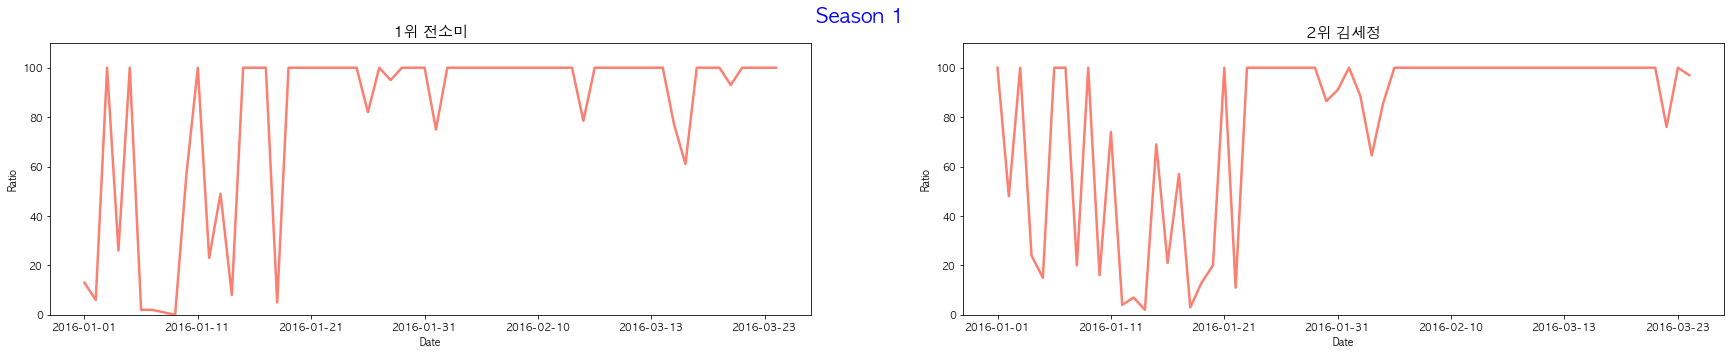

In [50]:
fig = plt.figure(figsize = (30, 5))
fig.suptitle('Season 1', fontsize = 20, fontweight = 'bold', color = 'b')

# rank01
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('1위 전소미', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank01['ratio'], color = 'salmon', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('2위 김세정', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank02['ratio'], color = 'salmon', linewidth = 2.5)

plt.show()

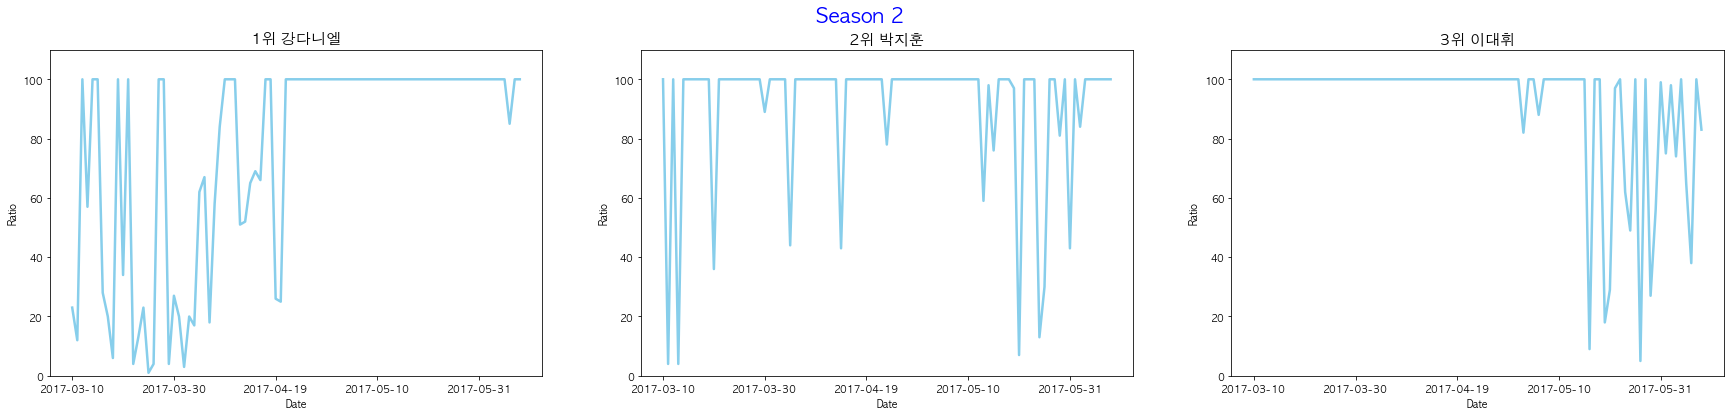

In [51]:
fig = plt.figure(figsize = (30, 6))
fig.suptitle('Season 2', fontsize = 20, fontweight = 'bold', color = 'b')

# rank01
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('1위 강다니엘', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_rank01.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank01['ratio'], color = 'skyblue', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title('2위 박지훈', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank02['ratio'], color = 'skyblue', linewidth = 2.5)

# rank03
ax1 = fig.add_subplot(1, 3, 3)
ax1.set_title('3위 이대휘', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank03['ratio'], color = 'skyblue', linewidth = 2.5)


plt.show()

In [52]:
s1_top = pd.concat([s1_rank01, s1_rank02])
s1_top = pd.pivot_table(s1_top, index = ['date'], values = ['ratio'], aggfunc = 'mean')

s2_top = pd.concat([s2_rank01, s2_rank02, s2_rank03])
s2_top = pd.pivot_table(s2_top, index = ['date'], values = ['ratio'], aggfunc = 'mean')

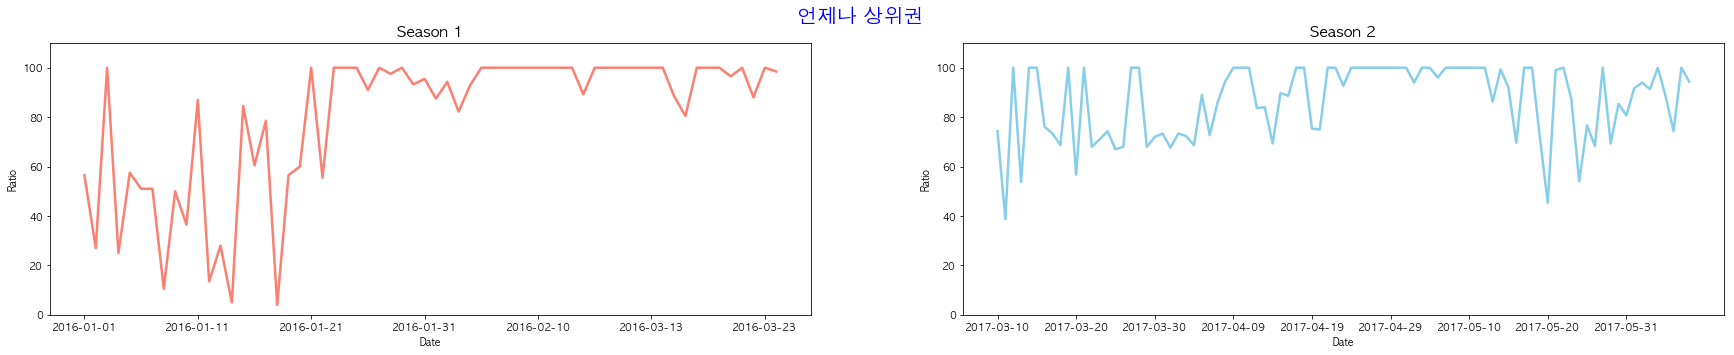

In [53]:
fig = plt.figure(figsize = (30, 5))
fig.suptitle('언제나 상위권', fontsize = 20, fontweight = 'bold', color = 'b')

# rank01
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Season 1', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_top.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_top['ratio'], color = 'salmon', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Season 2', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_top.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s2_top['ratio'], color = 'skyblue', linewidth = 2.5)

plt.show()

### 2. 대체로 상위권

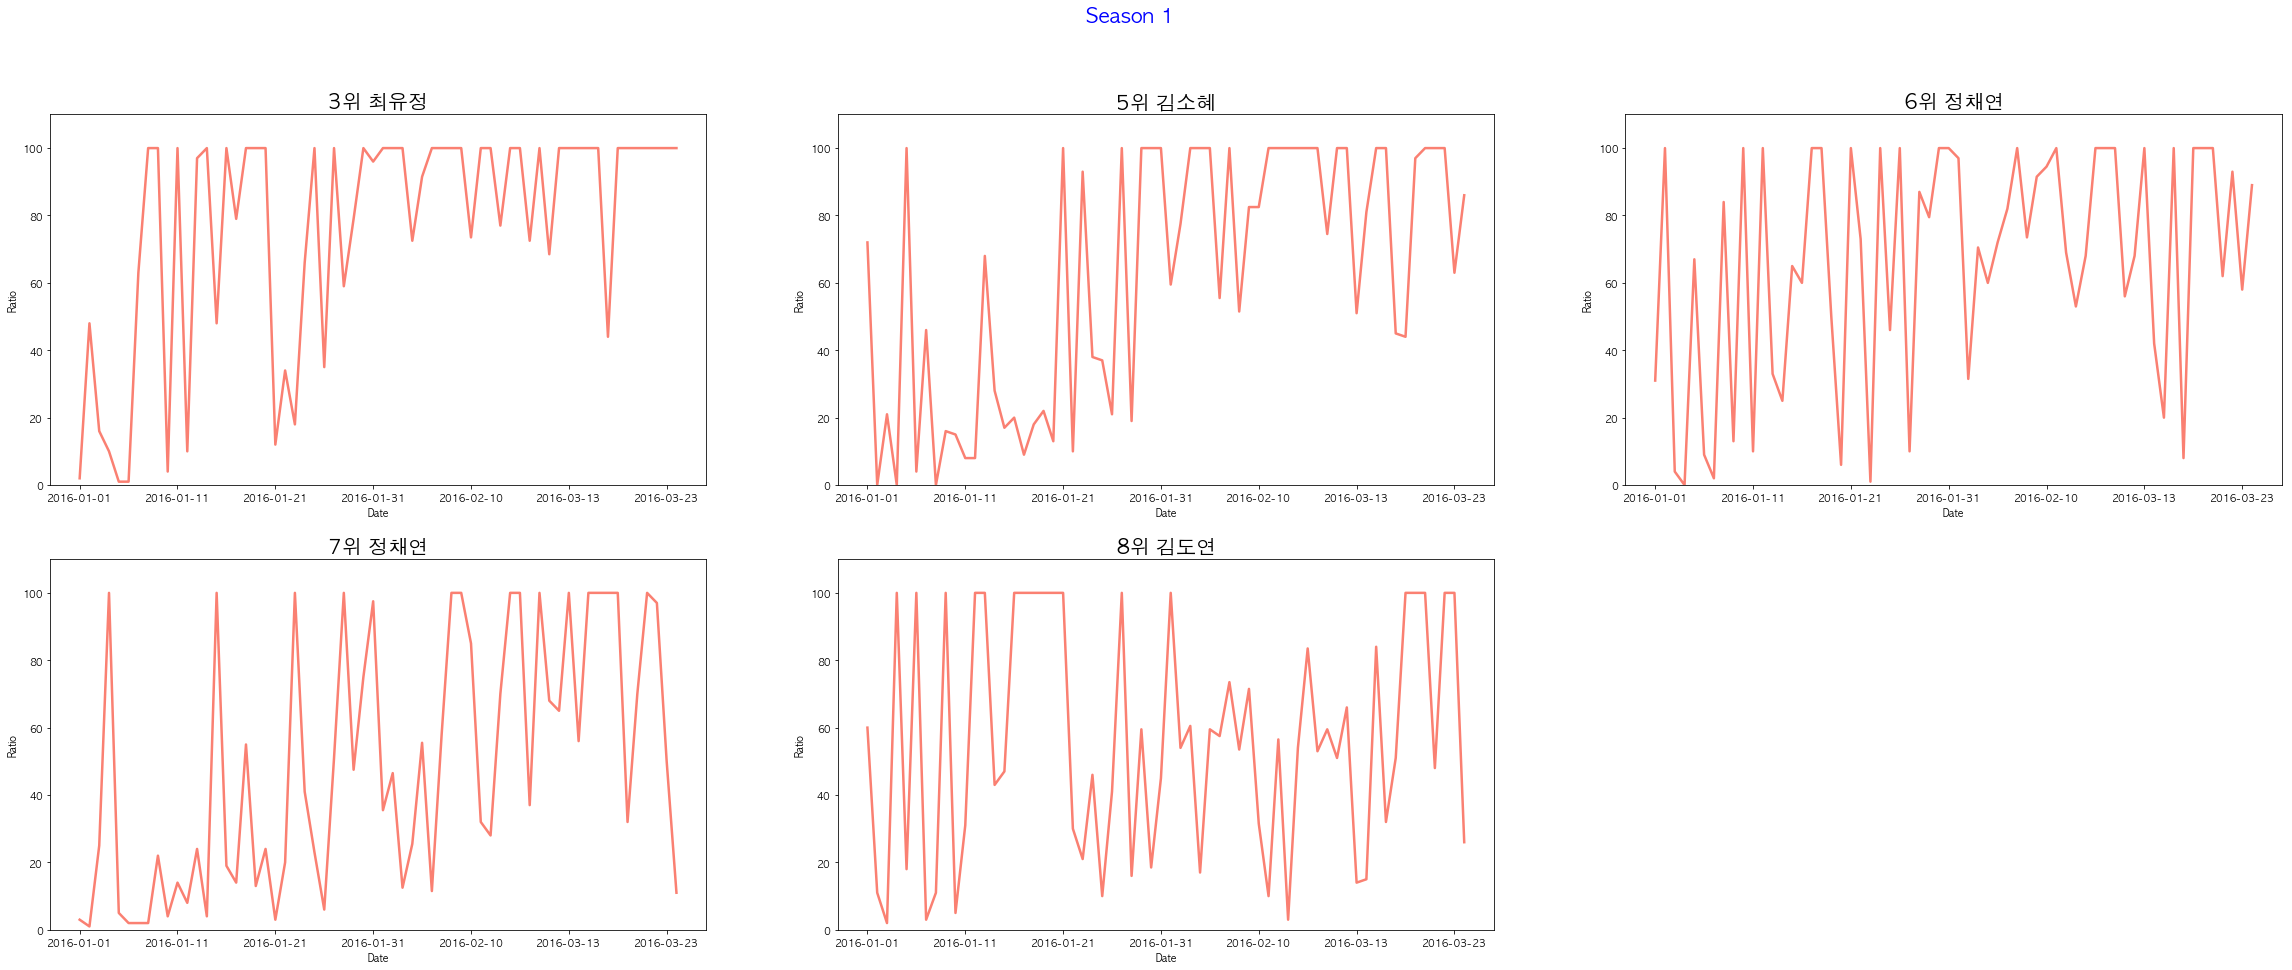

In [54]:
fig = plt.figure(figsize = (40, 15))
fig.suptitle('Season 1', fontsize = 20, fontweight = 'bold', color = 'b')

# rank03
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('3위 최유정', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank01.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank03['ratio'], color = 'salmon', linewidth = 2.5)

# rank05
ax1 = fig.add_subplot(2, 3, 2)
ax1.set_title('5위 김소혜', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank05['ratio'], color = 'salmon', linewidth = 2.5)

# rank06
ax1 = fig.add_subplot(2, 3, 3)
ax1.set_title('6위 정채연', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank06['ratio'], color = 'salmon', linewidth = 2.5)

# rank07
ax1 = fig.add_subplot(2, 3, 4)
ax1.set_title('7위 정채연', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank07['ratio'], color = 'salmon', linewidth = 2.5)

# rank08
ax1 = fig.add_subplot(2, 3, 5)
ax1.set_title('8위 김도연', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank08['ratio'], color = 'salmon', linewidth = 2.5)

plt.show()

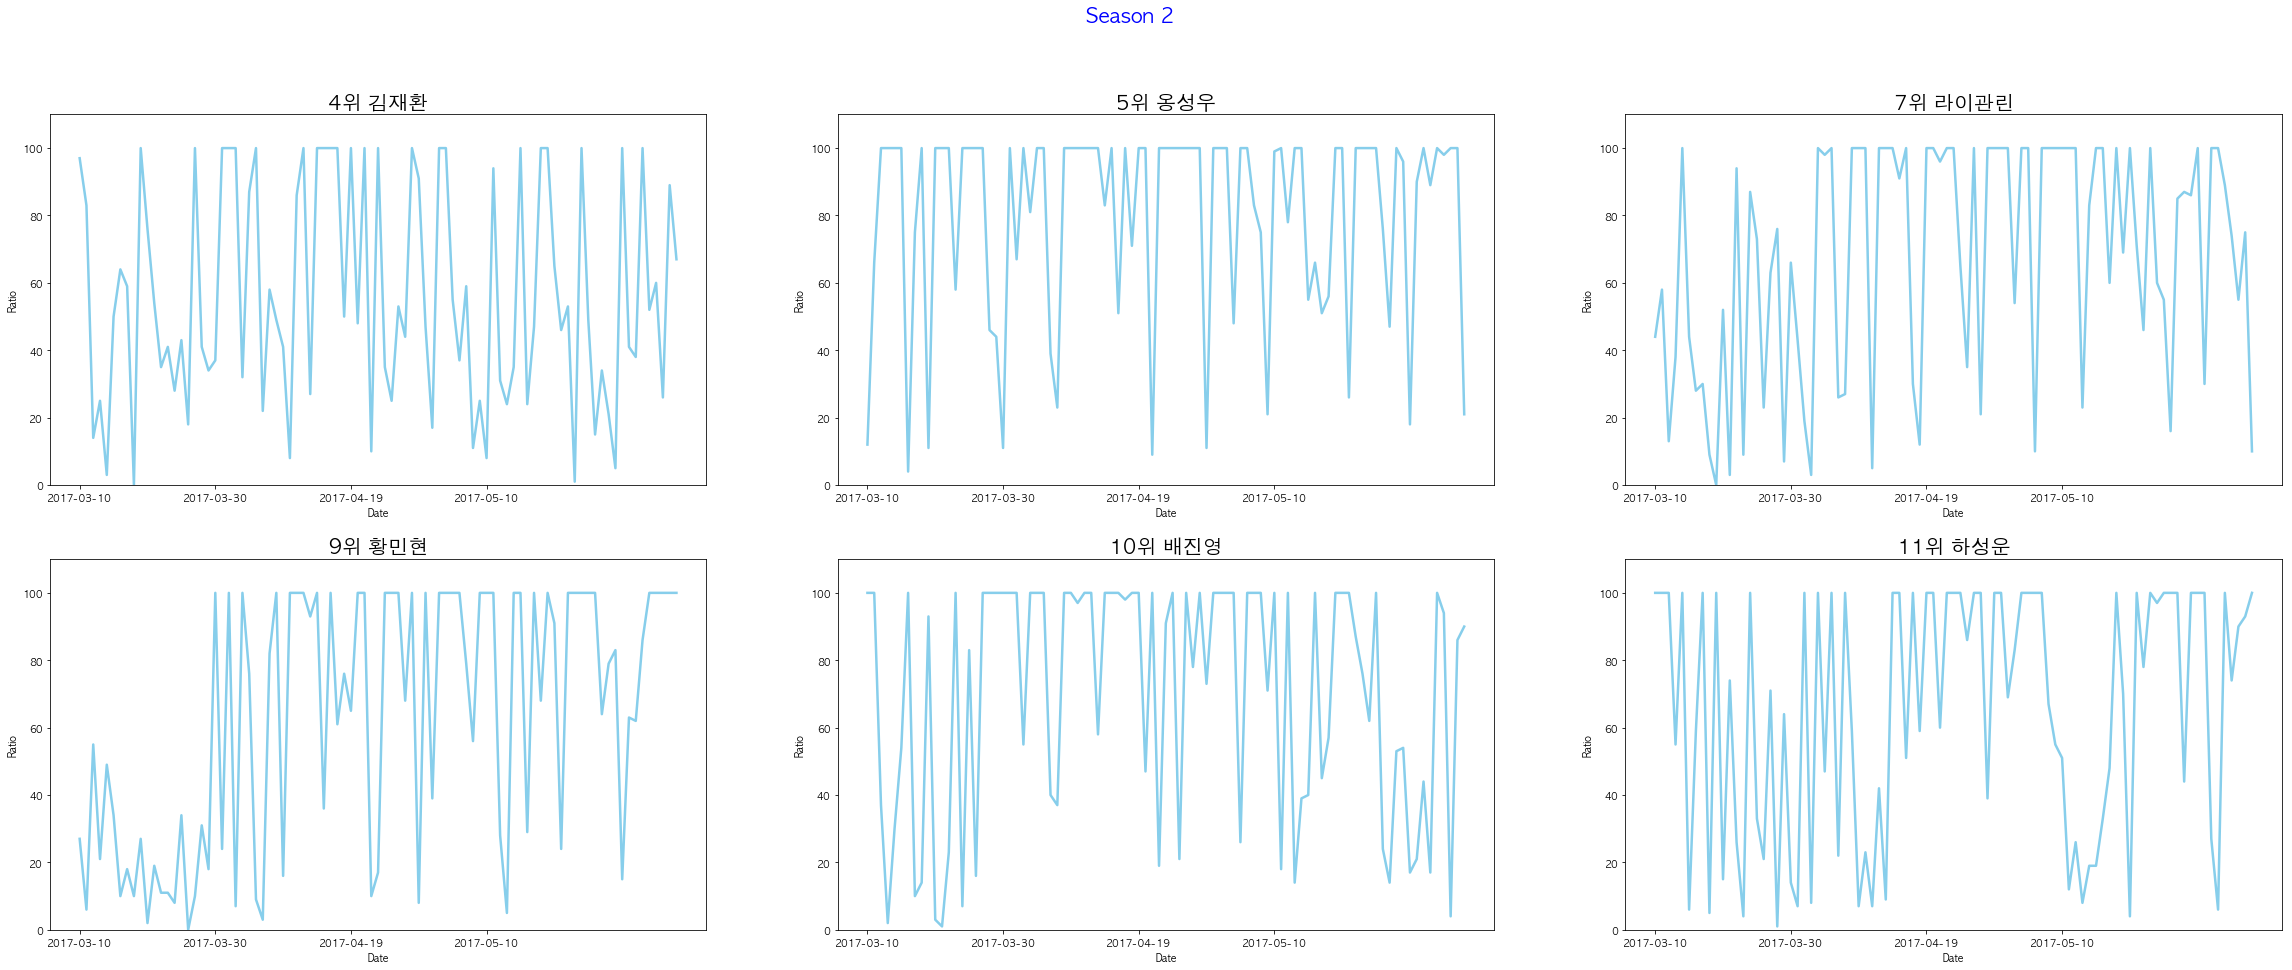

In [55]:
fig = plt.figure(figsize = (40, 15))
fig.suptitle('Season 2', fontsize = 20, fontweight = 'bold', color = 'b')

# rank04
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('4위 김재환', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank04['ratio'], color = 'skyblue', linewidth = 2.5)

# rank05
ax1 = fig.add_subplot(2, 3, 2)
ax1.set_title('5위 옹성우', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank05['ratio'], color = 'skyblue', linewidth = 2.5)

# rank07
ax1 = fig.add_subplot(2, 3, 3)
ax1.set_title('7위 라이관린', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank07['ratio'], color = 'skyblue', linewidth = 2.5)

# rank09
ax1 = fig.add_subplot(2, 3, 4)
ax1.set_title('9위 황민현', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank09['ratio'], color = 'skyblue', linewidth = 2.5)

# rank10
ax1 = fig.add_subplot(2, 3, 5)
ax1.set_title('10위 배진영', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank10['ratio'], color = 'skyblue', linewidth = 2.5)

# rank 11
ax1 = fig.add_subplot(2, 3, 6)
ax1.set_title('11위 하성운', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank11['ratio'], color = 'skyblue', linewidth = 2.5)

plt.show()

In [56]:
s1_good = pd.concat([s1_rank03, s1_rank05, s1_rank06, s1_rank07, s1_rank08])
s1_good = pd.pivot_table(s1_good, index = ['date'], values = ['ratio'], aggfunc = 'mean')

s2_good = pd.concat([s2_rank04, s2_rank05, s2_rank07, s2_rank09, s2_rank10, s2_rank11])
s2_good = pd.pivot_table(s2_good, index = ['date'], values = ['ratio'], aggfunc = 'mean')

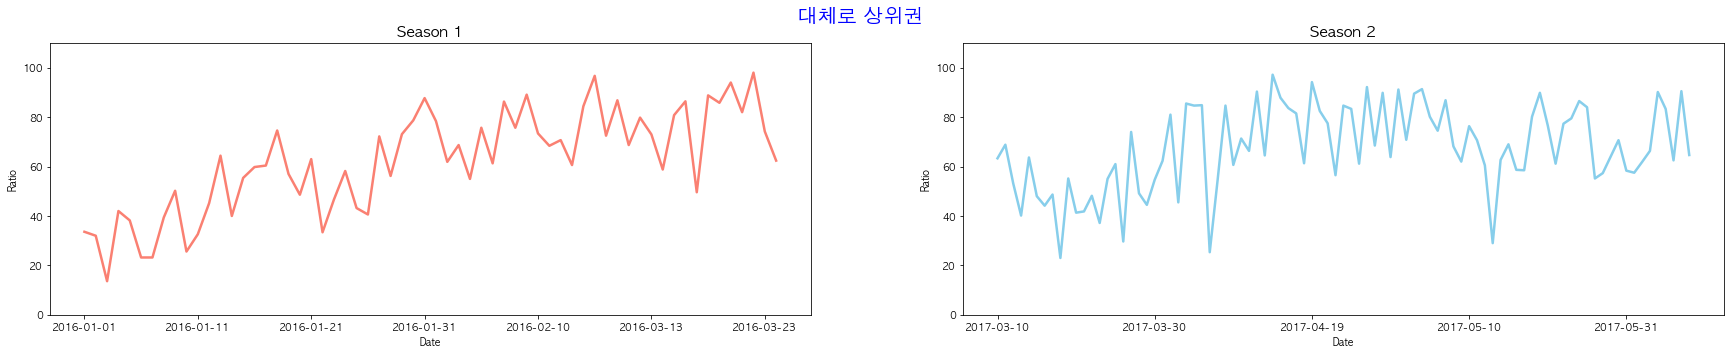

In [57]:
fig = plt.figure(figsize = (30, 5))
fig.suptitle('대체로 상위권', fontsize = 20, fontweight = 'bold', color = 'b')

# rank01
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Season 1', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_good.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_good['ratio'], color = 'salmon', linewidth = 2.5)

# rank02
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Season 2', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_good.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_good['ratio'], color = 'skyblue', linewidth = 2.5)

plt.show()

### 3. 급상승

- 급상승 그래프는 평균 그래프를 생략한다. 

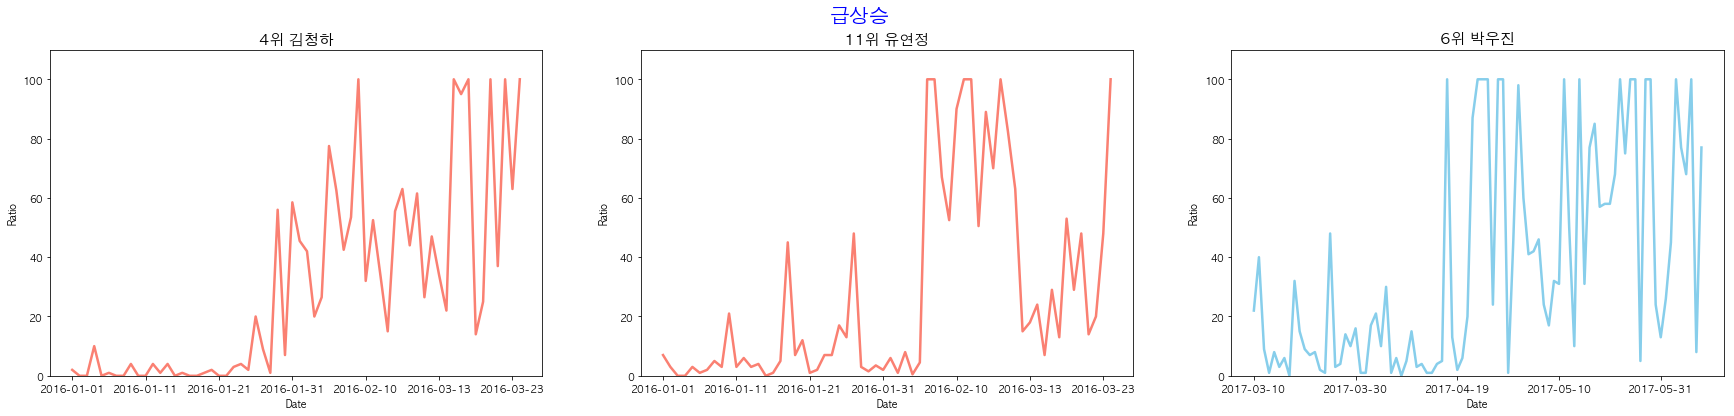

In [58]:
fig = plt.figure(figsize = (30, 6))
fig.suptitle('급상승', fontsize = 20, fontweight = 'bold', color = 'b')

# rank04
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('4위 김청하', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank04.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank04['ratio'], color = 'salmon', linewidth = 2.5)

# rank11
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title('11위 유연정', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank09.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank11['ratio'], color = 'salmon', linewidth = 2.5)

# rank06
ax1 = fig.add_subplot(1, 3, 3)
ax1.set_title('6위 박우진', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_rank06.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank06['ratio'], color = 'skyblue', linewidth = 2.5)


plt.show()

### 4. 예외

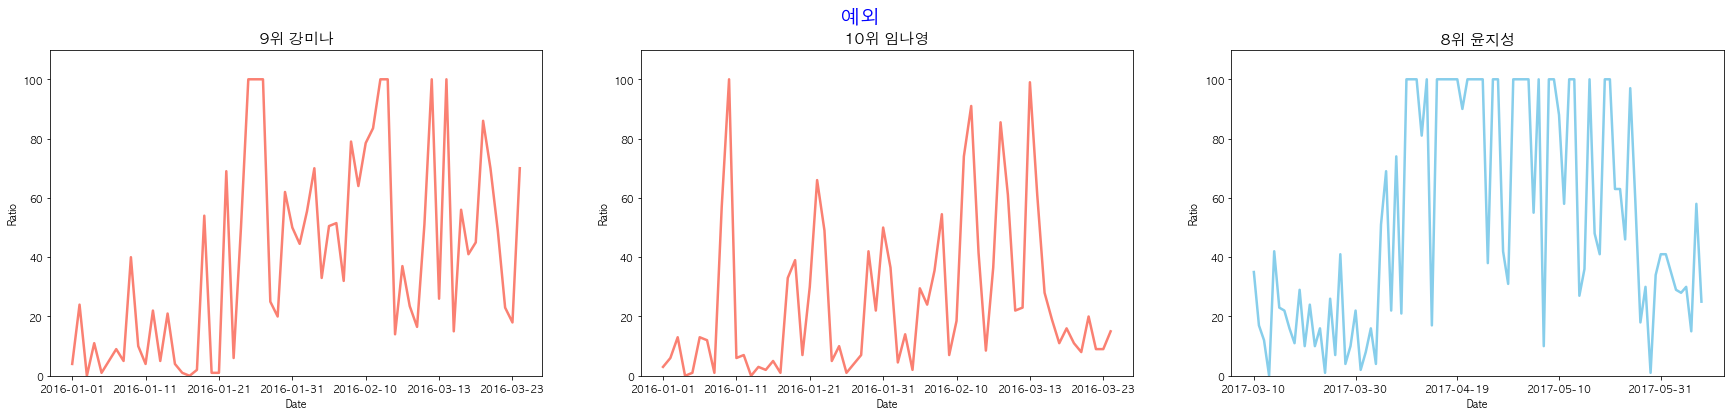

In [59]:
fig = plt.figure(figsize = (30, 6))
fig.suptitle('예외', fontsize = 20, fontweight = 'bold', color = 'b')

# rank09
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('9위 강미나', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank09.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank09['ratio'], color = 'salmon', linewidth = 2.5)

# rank10
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title('10위 임나영', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s1_rank09.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank10['ratio'], color = 'salmon', linewidth = 2.5)

# rank08
ax1 = fig.add_subplot(1, 3, 3)
ax1.set_title('8위 윤지성', size = 15)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s2_rank06.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank08['ratio'], color = 'skyblue', linewidth = 2.5)


plt.show()

## 데뷔하지 못한 연습생 그래프 그리기

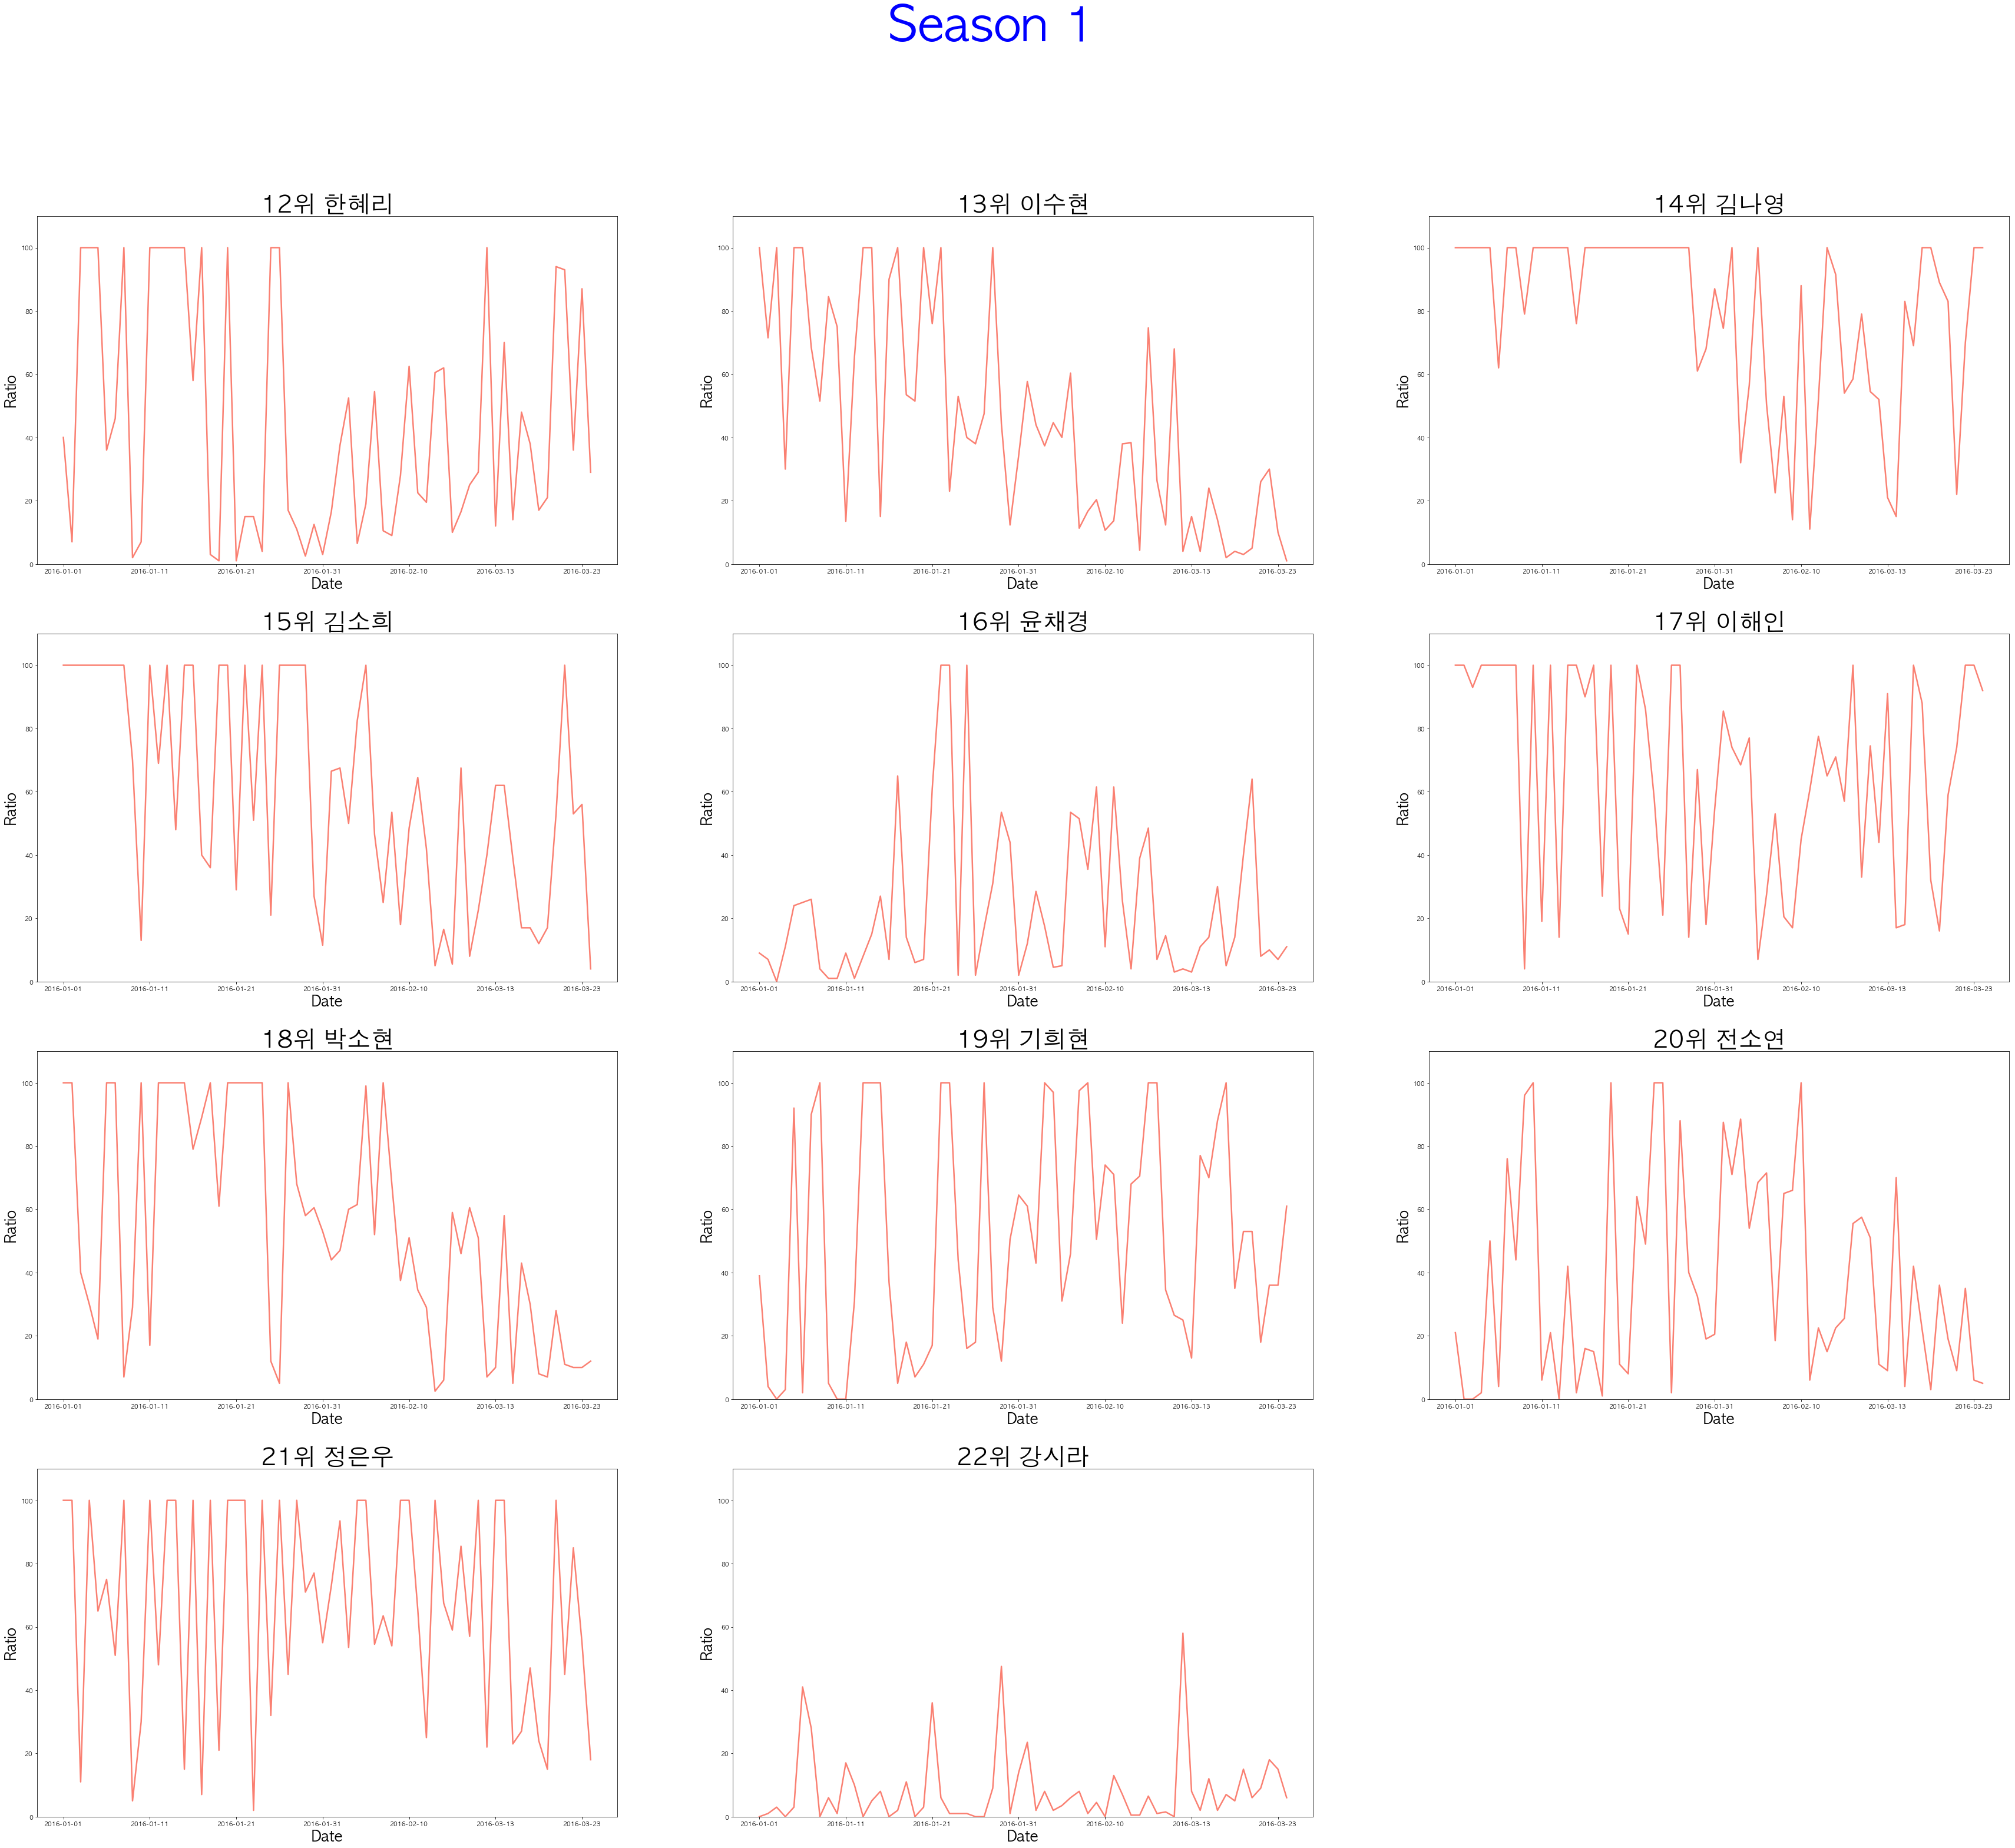

In [62]:
fig = plt.figure(figsize = (60,50))
fig.suptitle('Season 1', fontsize = 80, color = 'b')

# rank12
ax1 = fig.add_subplot(4, 3, 1)
ax1.set_title('12위 한혜리', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank12.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank12['ratio'], color = 'salmon', linewidth = 2.5)

# rank13
ax1 = fig.add_subplot(4, 3, 2)
ax1.set_title('13위 이수현', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank13.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank13['ratio'], color = 'salmon', linewidth = 2.5)

# rank14
ax1 = fig.add_subplot(4, 3, 3)
ax1.set_title('14위 김나영', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank14.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank14['ratio'], color = 'salmon', linewidth = 2.5)

# rank15
ax1 = fig.add_subplot(4, 3, 4)
ax1.set_title('15위 김소희', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank15.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank15['ratio'], color = 'salmon', linewidth = 2.5)

# rank16
ax1 = fig.add_subplot(4, 3, 5)
ax1.set_title('16위 윤채경', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank16.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank16['ratio'], color = 'salmon', linewidth = 2.5)

# rank17
ax1 = fig.add_subplot(4, 3, 6)
ax1.set_title('17위 이해인', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank17.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank17['ratio'], color = 'salmon', linewidth = 2.5)

# rank18
ax1 = fig.add_subplot(4, 3, 7)
ax1.set_title('18위 박소현', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank18.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank18['ratio'], color = 'salmon', linewidth = 2.5)

# rank19
ax1 = fig.add_subplot(4, 3, 8)
ax1.set_title('19위 기희현', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank19.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank19['ratio'], color = 'salmon', linewidth = 2.5)

# rank020
ax1 = fig.add_subplot(4, 3, 9)
ax1.set_title('20위 전소연', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank20.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank20['ratio'], color = 'salmon', linewidth = 2.5)

# rank021
ax1 = fig.add_subplot(4, 3, 10)
ax1.set_title('21위 정은우', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank21.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank21['ratio'], color = 'salmon', linewidth = 2.5)


# rank22
ax1 = fig.add_subplot(4, 3, 11)
ax1.set_title('22위 강시라', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s1_rank22.index), 10))
ax1.set_ylim([0, 110])
ax1.plot(s1_rank22['ratio'], color = 'salmon', linewidth = 2.5)



plt.show()


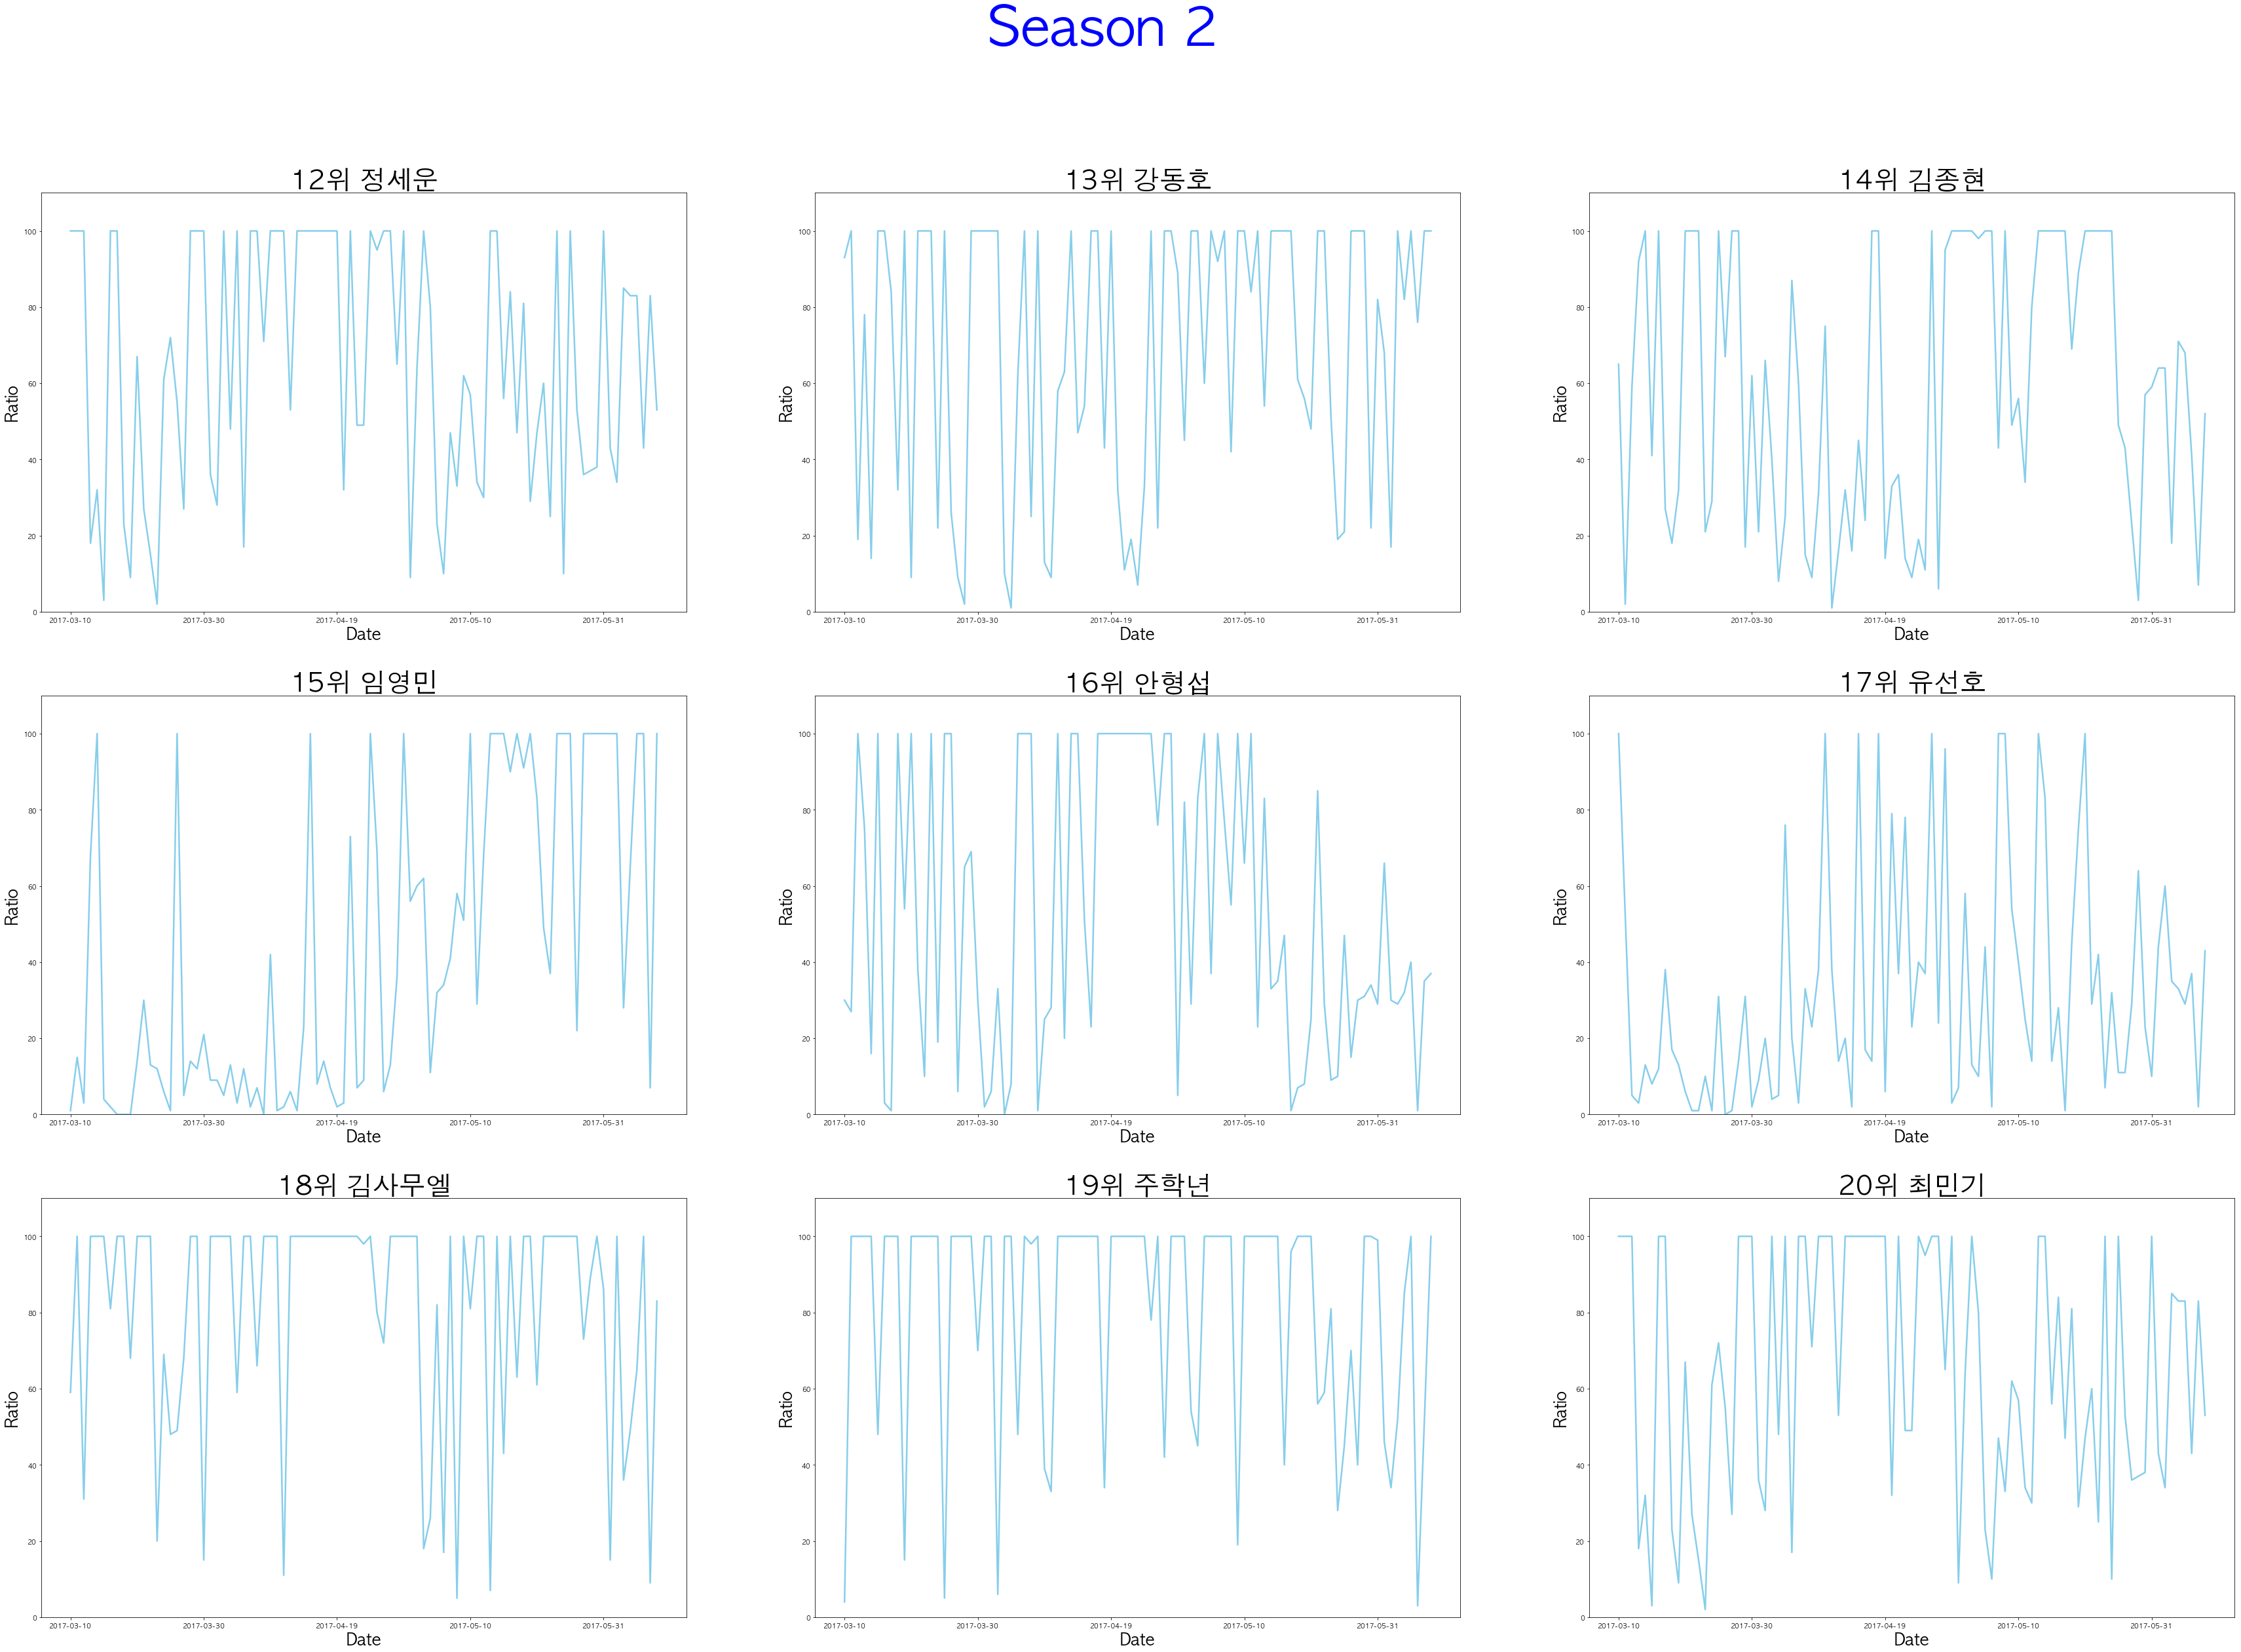

In [61]:
fig = plt.figure(figsize = (60,40))
fig.suptitle('Season 2', fontsize = 80, color = 'b')

# rank12
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('12위 정세운', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank12['ratio'], color = 'skyblue', linewidth = 2.5)

# rank13
ax1 = fig.add_subplot(3, 3, 2)
ax1.set_title('13위 강동호', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank13.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank13['ratio'], color = 'skyblue', linewidth = 2.5)

# rank14
ax1 = fig.add_subplot(3, 3, 3)
ax1.set_title('14위 김종현', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank14['ratio'], color = 'skyblue', linewidth = 2.5)

# rank15
ax1 = fig.add_subplot(3, 3, 4)
ax1.set_title('15위 임영민', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank15['ratio'], color = 'skyblue', linewidth = 2.5)

# rank16
ax1 = fig.add_subplot(3, 3, 5)
ax1.set_title('16위 안형섭', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank16['ratio'], color = 'skyblue', linewidth = 2.5)

# rank17
ax1 = fig.add_subplot(3, 3, 6)
ax1.set_title('17위 유선호', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank17['ratio'], color = 'skyblue', linewidth = 2.5)

# rank18
ax1 = fig.add_subplot(3, 3, 7)
ax1.set_title('18위 김사무엘', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank18['ratio'], color = 'skyblue', linewidth = 2.5)

# rank19
ax1 = fig.add_subplot(3, 3, 8)
ax1.set_title('19위 주학년', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank19.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank19['ratio'], color = 'skyblue', linewidth = 2.5)

# rank020
ax1 = fig.add_subplot(3, 3, 9)
ax1.set_title('20위 최민기', size = 40)
ax1.set_xlabel('Date', fontsize = 25)
ax1.set_ylabel('Ratio', fontsize = 25)
ax1.set_xticks(np.arange(0, len(s2_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s2_rank12['ratio'], color = 'skyblue', linewidth = 2.5)



plt.show()